<a href="https://colab.research.google.com/github/EumGitae/Machine-Learning/blob/main/10week_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras import utils

In [43]:
utils.set_random_seed(0)
np.random.seed(0)
samples = 1000

In [44]:
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

In [45]:
print(x1.shape)
print(x2.shape)

(1000,)
(1000,)


In [46]:
Input = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 - 1

In [47]:
input_layer = 2
hidden_layer = 3
output_layer = 1

In [48]:
W1 = np.random.rand(hidden_layer, input_layer)
b1 = np.random.rand(hidden_layer)
W2 = np.random.rand(output_layer, hidden_layer)
b2 = np.random.rand(output_layer)

In [49]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(3, 2)
(3,)
(1, 3)
(1,)


In [50]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [51]:
alpha = 1e-2
epochs = 50
MSE_list, MAPE_list = [], []

In [52]:
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(samples):
        X = Input[iter]
        # Feedforward
        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        H = sigmoid(Z_tilde)
        y_pred = W2@H.reshape(-1,1) + b2.reshape(-1,1)

        #Calculating the error
        J = ((y_pred - y[iter])**2 ) / 2
        MSE += J
        MAPE += np.abs((y_pred - y[iter])/y[iter]) * 100

        # Backpropagation
        # Output layer -> hidden layer
        dJdy = (y_pred - y[iter])
        dJdW2_11, dJdW2_12, dJdW2_13 = dJdy*H[0], dJdy*H[1], dJdy*H[2]
        dJdb2_1 = dJdy
        dJdH1, dJdH2, dJdH3 = dJdy*W2[0, 0], dJdy*W2[0, 1], dJdy*W2[0, 2]

        # Hidden layer --> Input layer
        dJdW1_11 = dJdH1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdH1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdH2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdH2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdH3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdH3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdb1_1 = dJdH1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdH2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdH3 * sigmoid_derivative(Z_tilde[2])

        # Update
        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32
        b1[0]    += -alpha * dJdb1_1
        b1[1]    += -alpha * dJdb1_2
        b1[2]    += -alpha * dJdb1_3
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        b2[0]    += -alpha*dJdb2_1

    MSE, MAPE = MSE/samples, MAPE/samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

<ipython-input-52-ead587a10394>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-52-ead587a10394>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-52-ead587a10394>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[1][0] += -alpha * dJdW1_21
<ipython-input-52-ead587a10394>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will erro

MSE and MAPE at epoch  0  : 0.4923692081588331  , 641.2237701880406
MSE and MAPE at epoch  5  : 0.022246601021031175  , 107.66956507883877
MSE and MAPE at epoch  10  : 0.0010939950284458314  , 6.327061349178779
MSE and MAPE at epoch  15  : 0.0009431841058067317  , 6.289273870287084
MSE and MAPE at epoch  20  : 0.000879499477765787  , 6.363546602574931
MSE and MAPE at epoch  25  : 0.0008454180822275695  , 6.422813654178073
MSE and MAPE at epoch  30  : 0.0008243076834218878  , 6.466028368064743
MSE and MAPE at epoch  35  : 0.0008091300290140491  , 6.569256908978918
MSE and MAPE at epoch  40  : 0.0007967970084727224  , 6.720565021532787
MSE and MAPE at epoch  45  : 0.0007859123333003955  , 6.823595534615884
MSE and MAPE at epoch  49  : 0.0007777988486311408  , 6.875034849438898


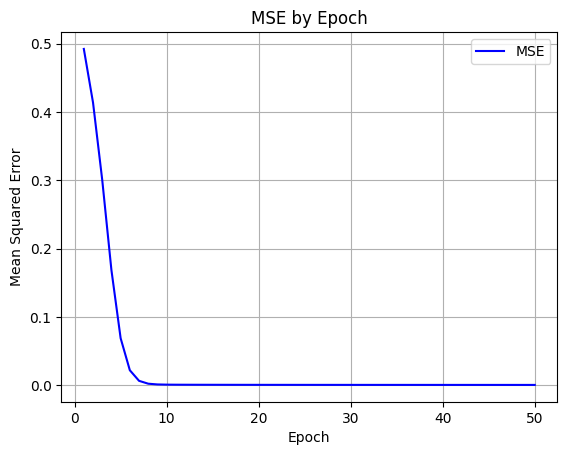

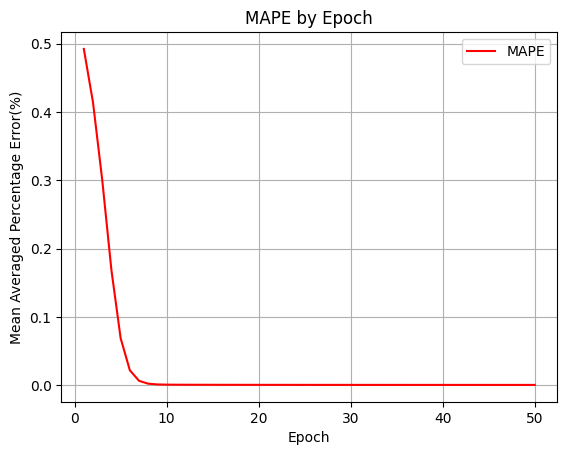

In [53]:
plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MAPE', linewidth=1.5, color='r')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()